   # Word Happiness 2022 Analysis 

In [1]:
#importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# surpress warning 

import warnings 
warnings.filterwarnings('ignore')

## 1. Cleaning and inspecting data

In [2]:
df = pd.read_csv("C:/Users/win/Desktop/tableau project/World Happiness Report 2022.csv")

In [3]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [4]:
df.shape   #ok

(146, 12)

In [5]:
df.info()   #done 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [6]:
df.isna().sum()   #no null values in any of columns (it is a good thingh)

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [7]:
df.tail(15)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
131,132,Yemen*,4.197,4.384,4.010,1.561,0.691,1.043,0.384,0.330,0.090,0.098
132,133,Mauritania*,4.153,4.356,3.950,1.207,1.100,0.865,0.450,0.304,0.088,0.138
133,134,Jordan,4.152,4.276,4.029,0.695,1.324,0.724,0.675,0.476,0.058,0.200
134,135,Togo,4.112,4.272,3.953,2.061,0.771,0.322,0.360,0.292,0.174,0.132
135,136,India,3.777,3.828,3.726,0.795,1.167,0.376,0.471,0.647,0.198,0.123
136,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083
137,138,Malawi,3.750,3.941,3.560,1.661,0.648,0.279,0.388,0.477,0.140,0.157
138,139,Tanzania,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,0.248,0.270
139,140,Sierra Leone,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,0.202,0.055
140,141,Lesotho*,3.512,3.748,3.276,1.312,0.839,0.848,0.000,0.419,0.076,0.018


In [8]:
df.head(15)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


In [9]:
#setting columns 1 as index 
df.index = df['RANK']

In [10]:
# duplicates counts 
df.duplicated().value_counts()

False    146
dtype: int64

'''What we found until now '''
- 1 There are 146 rows and 12 columns.
- 2 no null values persent 
- 3 no duplicates value persent in this dataset.
- 4 finland ranks 1 and afganistan ranks last in this dataset .

# 2 checking distribution 

In [11]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

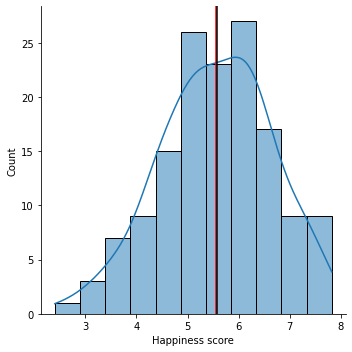

In [12]:
#distribution of Happiness score 
sns.displot(df['Happiness score'],kde=True)

plt.axvline(x = df['Happiness score'].mean(), color = 'red')

plt.axvline(x = df['Happiness score'].median(), color = 'black')


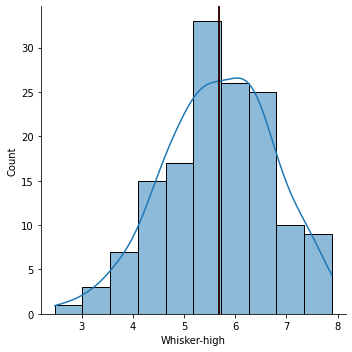

In [13]:
#distribution of Whisker high
sns.displot(df['Whisker-high'],kde=True)

plt.axvline(x = df['Whisker-high'].mean(), color = 'red')

plt.axvline(x = df['Whisker-high'].median(), color = 'black')

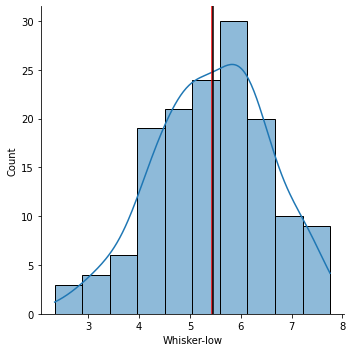

In [14]:
#distribution of Whisker low
sns.displot(df['Whisker-low'],kde=True)

plt.axvline(x = df['Whisker-low'].mean(), color = 'red')

plt.axvline(x = df['Whisker-low'].median(), color = 'black')

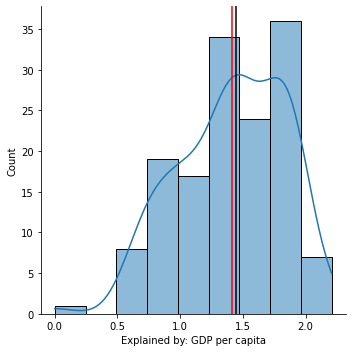

In [15]:
#distribution of Explained by: GDP per capita
sns.displot(df['Explained by: GDP per capita'],kde=True)

plt.axvline(x = df['Explained by: GDP per capita'].mean(), color = 'red')

plt.axvline(x = df['Explained by: GDP per capita'].median(), color = 'black')

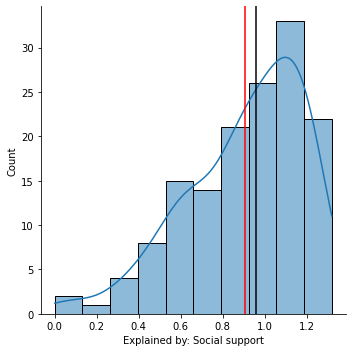

In [16]:
# distribution of 'Explained by: Social support'

sns.displot(df['Explained by: Social support'],kde=True)

plt.axvline(x = df['Explained by: Social support'].mean(), color = 'red')

plt.axvline(x = df['Explained by: Social support'].median(), color = 'black')

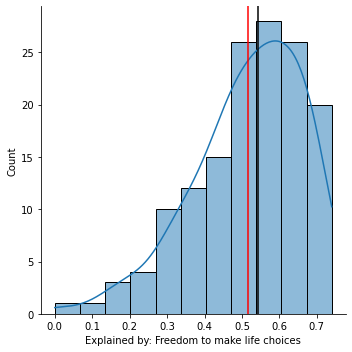

In [17]:
# distribution of  'Explained by: Freedom to make life choices'

sns.displot(df[ 'Explained by: Freedom to make life choices'],kde=True)

plt.axvline(x = df[ 'Explained by: Freedom to make life choices'].mean(), color = 'red')

plt.axvline(x = df[ 'Explained by: Freedom to make life choices'].median(), color = 'black')

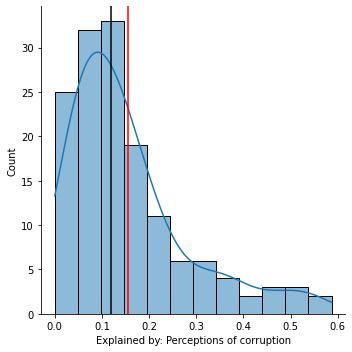

In [18]:
# distribution of  'Explained by: Perceptions of corruption'

sns.displot(df[ 'Explained by: Perceptions of corruption'],kde=True)

plt.axvline(x = df[ 'Explained by: Perceptions of corruption'].mean(), color = 'red')

plt.axvline(x = df[ 'Explained by: Perceptions of corruption'].median(), color = 'black')

# 3 Checking Outliners 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Happiness score'),
  Text(2, 0, 'Whisker-high'),
  Text(3, 0, 'Whisker-low'),
  Text(4, 0, 'Dystopia (1.83) + residual'),
  Text(5, 0, 'Explained by: GDP per capita'),
  Text(6, 0, 'Explained by: Social support'),
  Text(7, 0, 'Explained by: Healthy life expectancy'),
  Text(8, 0, 'Explained by: Freedom to make life choices'),
  Text(9, 0, 'Explained by: Generosity'),
  Text(10, 0, 'Explained by: Perceptions of corruption')])

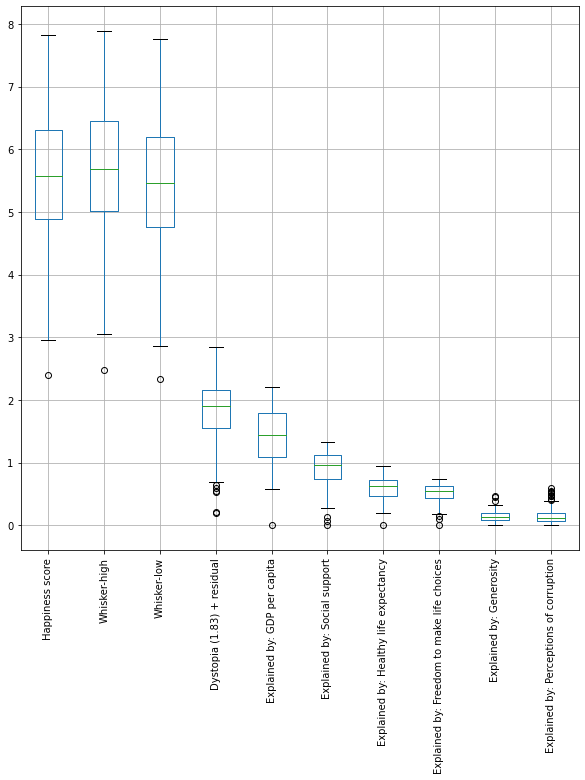

In [19]:
Boxpolot_data = df.drop(columns = ['RANK'])

plt.figure(figsize = (10,10))

Boxpolot_data.boxplot()

plt.xticks(rotation = 90)

# what we can conclude till now 
- It looks like that mean is almost equal to mode, so we can say that this data is almost normally distributed.

- There are only few outliners which are having a very less effect on the mean.



# 4 Analysis

In [20]:
# top 15 Happiest countries

Top_15 = df.head(15)
Top_15

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,,,,,,,,,,,,
1,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
2,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
3,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
4,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
5,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
6,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
7,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
8,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
9,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143


<Figure size 1440x1440 with 0 Axes>

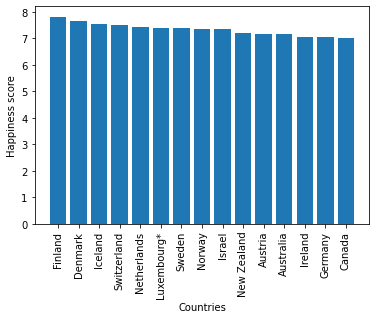

<Figure size 1440x1440 with 0 Axes>

In [21]:
plt.bar(Top_15['Country'],Top_15['Happiness score'])

plt.xticks(rotation = 90)  #for label rotation 

plt.xlabel("Countries")
plt.ylabel("Happiness score")

plt.figure(figsize= (20,20))





([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

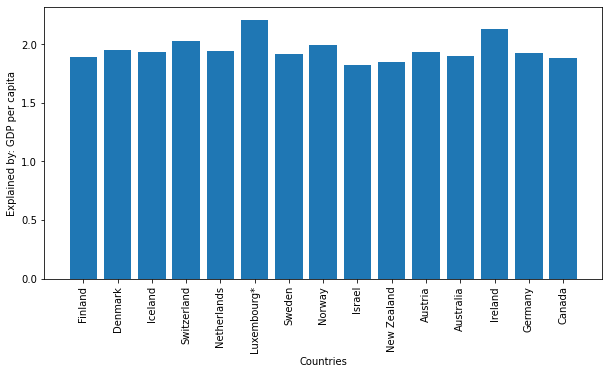

In [22]:
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: GDP per capita'])

plt.xlabel('Countries')
plt.ylabel('Explained by: GDP per capita')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

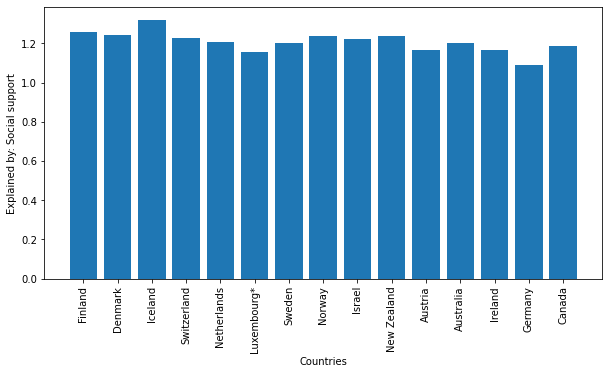

In [23]:
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: Social support'])

plt.xlabel('Countries')
plt.ylabel('Explained by: Social support')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

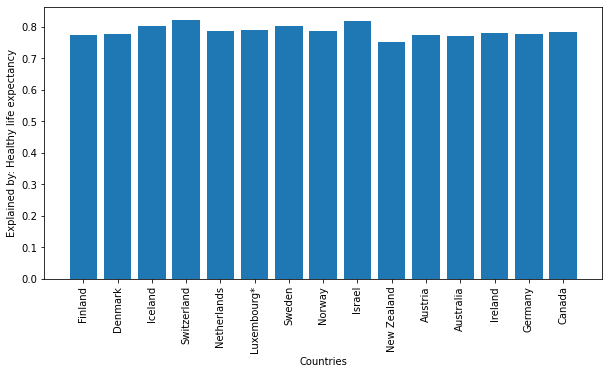

In [24]:
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: Healthy life expectancy'])

plt.xlabel('Countries')
plt.ylabel('Explained by: Healthy life expectancy')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

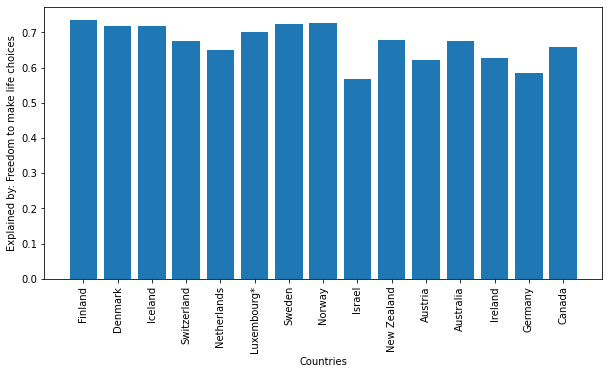

In [25]:
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: Freedom to make life choices'])

plt.xlabel('Countries')
plt.ylabel('Explained by: Freedom to make life choices')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

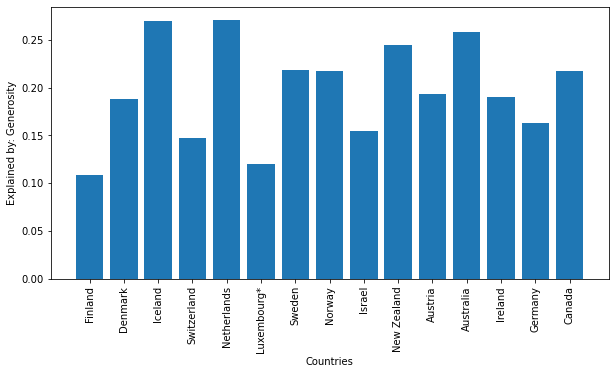

In [26]:
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: Generosity'])

plt.xlabel('Countries')
plt.ylabel('Explained by: Generosity')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

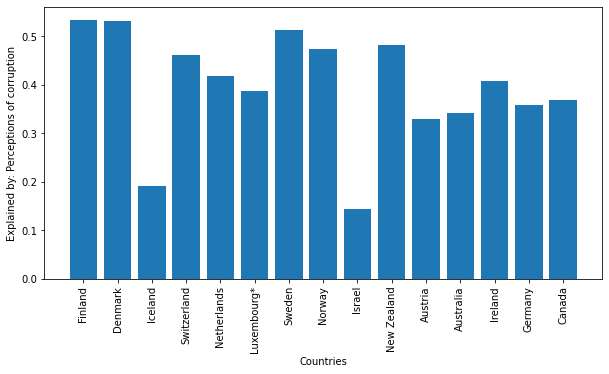

In [27]:
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: Perceptions of corruption'])

plt.xlabel('Countries')
plt.ylabel('Explained by: Perceptions of corruption')

plt.xticks(rotation = 90)

- beacause these are top in  : 
                                  - good social support.
                                       - people get freedom to make life choices
                                        - and Healthy life expectancy is also good in these countries .
                                                       

# what we can conclude till now 
- we see there why are top countries on top .
- they have good rate in every aspect Related to happiness score .
- 


In [28]:
# Last 15 countries.

Last_15 = df.tail(15)
Last_15

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,,,,,,,,,,,,
132,132,Yemen*,4.197,4.384,4.010,1.561,0.691,1.043,0.384,0.330,0.090,0.098
133,133,Mauritania*,4.153,4.356,3.950,1.207,1.100,0.865,0.450,0.304,0.088,0.138
134,134,Jordan,4.152,4.276,4.029,0.695,1.324,0.724,0.675,0.476,0.058,0.200
135,135,Togo,4.112,4.272,3.953,2.061,0.771,0.322,0.360,0.292,0.174,0.132
136,136,India,3.777,3.828,3.726,0.795,1.167,0.376,0.471,0.647,0.198,0.123
137,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083
138,138,Malawi,3.750,3.941,3.560,1.661,0.648,0.279,0.388,0.477,0.140,0.157
139,139,Tanzania,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,0.248,0.270
140,140,Sierra Leone,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,0.202,0.055


<Figure size 1440x1440 with 0 Axes>

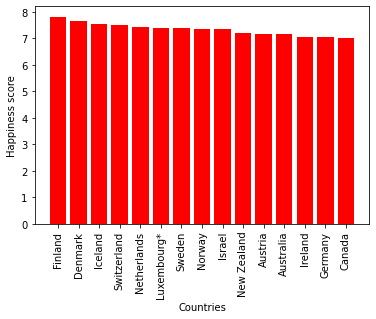

<Figure size 1440x1440 with 0 Axes>

In [29]:
#top 
plt.bar(Top_15['Country'],Top_15['Happiness score'],color ='r')

plt.xticks(rotation = 90)  #for label rotation 

plt.xlabel("Countries")
plt.ylabel("Happiness score")

plt.figure(figsize= (20,20))

<Figure size 1440x1440 with 0 Axes>

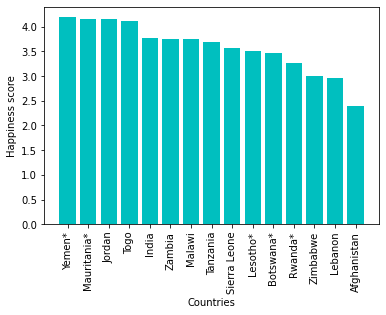

<Figure size 1440x1440 with 0 Axes>

In [30]:
#last 
plt.bar(Last_15['Country'],Last_15['Happiness score'],color ='c')

plt.xticks(rotation = 90)  #for label rotation 

plt.xlabel("Countries")
plt.ylabel("Happiness score")

plt.figure(figsize= (20,20))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

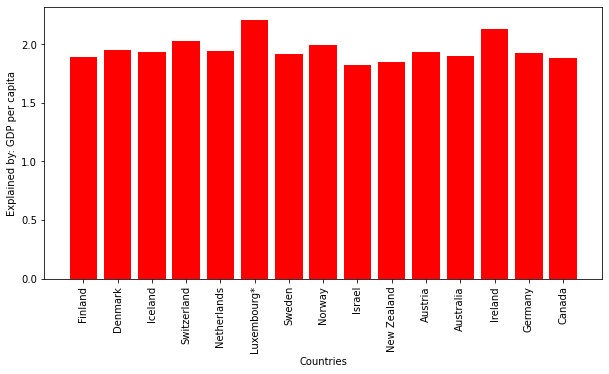

In [31]:
#top countries per capita 
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: GDP per capita'],color = 'r')

plt.xlabel('Countries')
plt.ylabel('Explained by: GDP per capita')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

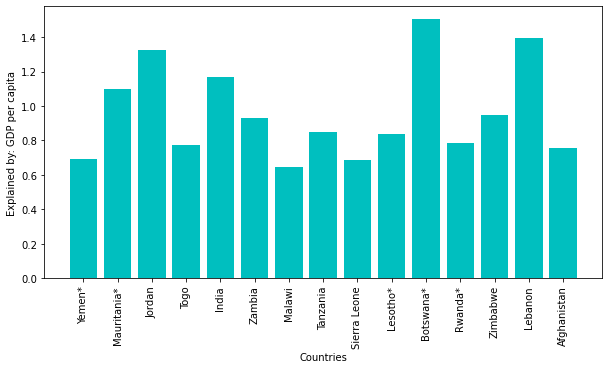

In [32]:
# last countries per capita 
plt.figure(figsize = (10,5))

plt.bar(Last_15['Country'],Last_15['Explained by: GDP per capita'],color = 'c')

plt.xlabel('Countries')
plt.ylabel('Explained by: GDP per capita')

plt.xticks(rotation = 90)

# what we found 
- Gdp affects happines rate because we see that India claimed 1st rank in most populated countries but per capita is lower than most of the country .


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

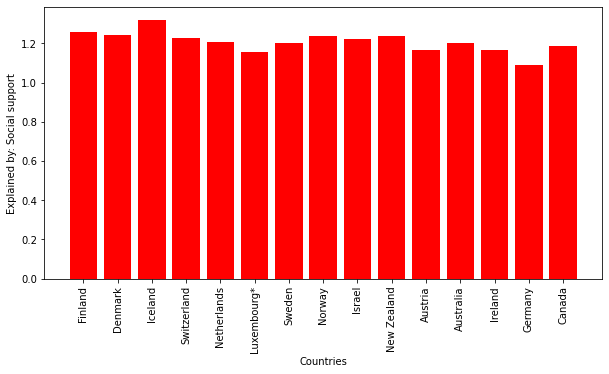

In [33]:
# top
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: Social support'],color = 'r')

plt.xlabel('Countries')
plt.ylabel('Explained by: Social support')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

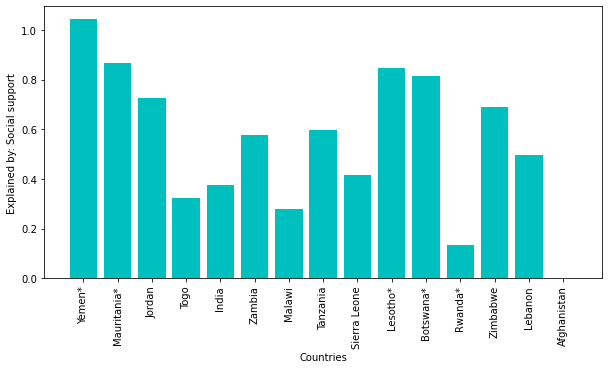

In [34]:
# last
plt.figure(figsize = (10,5))

plt.bar(Last_15['Country'],Last_15['Explained by: Social support'],color = 'c')

plt.xlabel('Countries')
plt.ylabel('Explained by: Social support')

plt.xticks(rotation = 90)

- we can see that why Social support is needed .
- top countries social support rate are very high with compare to last ranked countries.
-  afganistan has 0 social support .(because afganistan facing income problem) 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

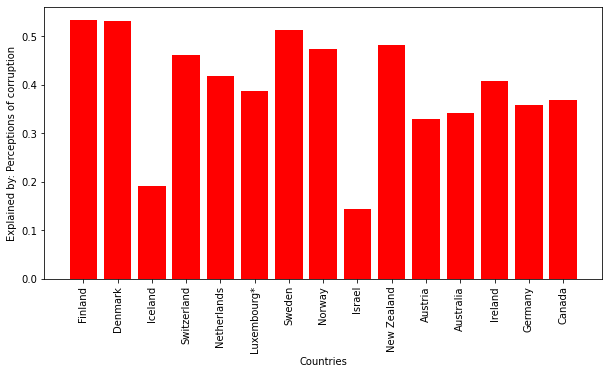

In [35]:
#top
plt.figure(figsize = (10,5))

plt.bar(Top_15['Country'],Top_15['Explained by: Perceptions of corruption'],color = 'r')

plt.xlabel('Countries')
plt.ylabel('Explained by: Perceptions of corruption')

plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

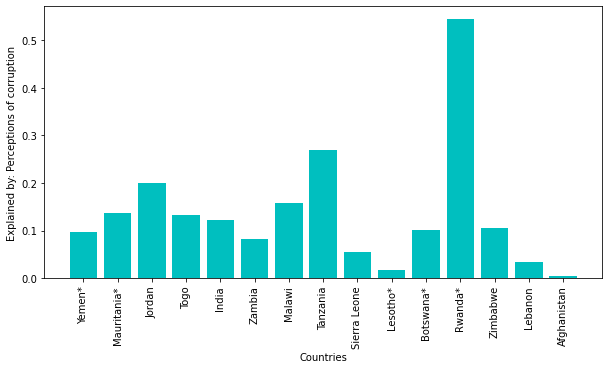

In [36]:
#last
plt.figure(figsize = (10,5))

plt.bar(Last_15['Country'],Last_15['Explained by: Perceptions of corruption'],color = 'c')

plt.xlabel('Countries')
plt.ylabel('Explained by: Perceptions of corruption')

plt.xticks(rotation = 90)

- yes corruption could be the main reason .
- Rwanda is one of the free corruption countries but Rwanda is not the happiest country.
- for most countries, corruption is the main hurdle.

In [37]:
# corruption free countries.
corruption_free =df.sort_values('Explained by: Perceptions of corruption').tail(15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

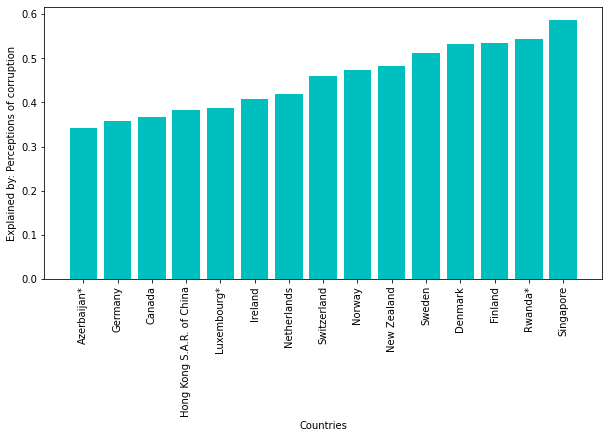

In [38]:
plt.figure(figsize = (10,5))

plt.bar(corruption_free['Country'],corruption_free['Explained by: Perceptions of corruption'],color = 'c')

plt.xlabel('Countries')
plt.ylabel('Explained by: Perceptions of corruption')

plt.xticks(rotation = 90)

In [39]:
#extraact india and finland data .
finland_2022 = df.loc[df["Country"]== "Finland",:].drop(columns= 'RANK')
finland_2022.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,,,,,,,,,,,
1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534


In [40]:
India_2022 = df.loc[df["Country"] == "India", :].drop(columns= 'RANK')
India_2022.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,,,,,,,,,,,
136,India,3.777,3.828,3.726,0.795,1.167,0.376,0.471,0.647,0.198,0.123


<AxesSubplot:title={'center':'India 2022'}, xlabel='RANK'>

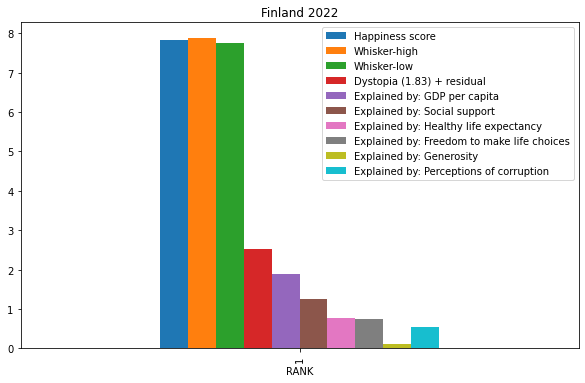

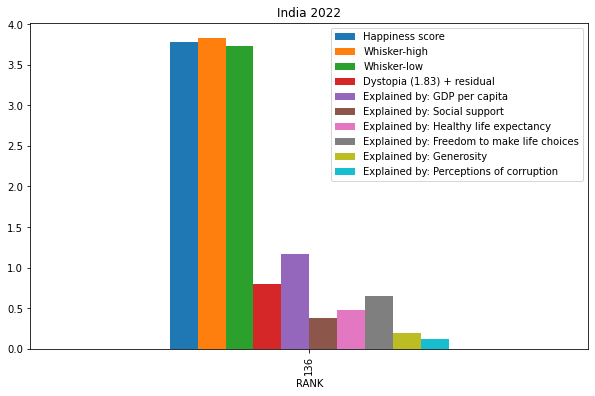

In [41]:
# Finland Rate in every aspect.

finland_2022.plot(kind = "bar",figsize = (10,6),title= 'Finland 2022')

India_2022.plot(kind= 'bar',figsize = (10,6),title = 'India 2022')

# what we get with this analysis 
- huge differance in happiness score of both coutries.
- india get high rate in generocity by finland .
- but get far behind in every other aspect .
- main focus of this analysis is why finland is happy than india beacause india is most populated than finland.
- that means population affacts countries happiness more than any aspect.

## ask & answer question
1. top 15 and last countries by happiness index?    (done)
2. what is the lowest rank countries lack to being at the top?(done)
3. why india is not in the top 15 ?
4. why afganistan is not happy country?
5. why are top countries on top?    (done)
6. is corruption affects the happiness rate ?(done)
7. is GDP per capita is the reason for other countries lacking behind.(done)
8. top corruption free countries.(done)
9. why most populated country india lacking behind from finland .(find every aspect).

# Conclusion
__Finland is the most happiest country in the world__

- It has its GDP less then many countries It has a good level of Social support and Healthy life Expectancy It ranks 1 (among top 15 Countries) in terms of freedom to make speech and Preception of corruption It has lowest Generosity (among top 10 Countries)

__Afghanistan Rank last In terms of Happiness Score__

- It ranks last in terms of Freedom to make choices and Preceptions of Corruption It ranks 4th in Last 15 countries in terms of Generosity It ranks 5th in Last 10 countries in terms of Healthy life expectancy It ranks 3rd in Last 10 countries in terms of GDP per capita

__Out of all the attributes GDP, Freedom to make choices, Social Support, Life Expectancy and Perception of Corruption are the once that contribute most to the happiness score__


__Rank increases when GDP Decreases but there are some exceptions same is the case with Health Expectancy, Freedom to make choices and Social Support but Generosity and Perception of corruption is on the lower side for majority of the Countries.__


